In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X_Train=pd.read_csv("./Training Data/Logistic_X_Train.csv").values;
print(X_Train.shape);
Y_Train=pd.read_csv("./Training Data/Logistic_Y_Train.csv").values;
print(Y_Train.shape)

(3000, 3)
(3000, 1)


In [3]:
m,n=X_Train.shape;
X=np.hstack((np.ones((m,1)),X_Train));
X.shape

(3000, 4)

In [4]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z));

def hypothesis(X,theta):
    hx=np.dot(X,theta);
    return sigmoid(hx);

def error(X,theta,y):
    hx=hypothesis(X,theta);
    err=y*np.log2(hx)+(1-y)*np.log2(1-hx);
    return -err.sum()/m;

def Gradient(X,theta,y):
    hx=hypothesis(X,theta);
    return np.dot(X.T,(hx-y))/X.shape[0];

def GradientDescent(X,y,iteration=500,alpha=0.1):
    err=[];
    theta=np.zeros((X.shape[1],1));
    for i in range(iteration):
        stepsize=alpha*Gradient(X,theta,y);
        theta=theta-stepsize;
        e=error(X,theta,y);
        err.append(e);
    
    return err,theta;

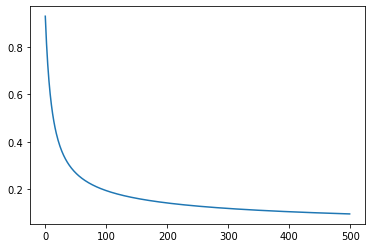

In [5]:
loss,best_theta=GradientDescent(X,Y_Train);
plt.plot(loss);

In [12]:
X_test=pd.read_csv("./Test Cases/Logistic_X_Test.csv").values;
print(X_test.shape)
X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test));

(1000, 3)


In [10]:
Y_output=hypothesis(X_test,best_theta);
Y_Predict=[];
for i in  Y_output :
    if(i<0.5):
        Y_Predict.append(1);
    else:
        Y_Predict.append(0);
    
print(Y_output.shape,len(Y_Predict))
Y_test=np.array(Y_Predict);

df=pd.DataFrame(Y_test,columns=["label"]);
df.head()
# df.to_csv?
df.to_csv("output.csv",index= False);

(1000, 1) 1000
